# <center> DATA 558 Midterm Take-Home Portion </center>
<center> Cathy Jia </center>
<center> Due May 19, 2019 by 11:59pm </center>

In [1]:
# Display all of the results.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Exercise 1

- Compute the gradient $\nabla F(\beta)$ of $F$.

We need to find the gradient $\nabla F(\beta)$ of

$$F(\beta) = \frac{1}{n}\sum _{i=1}^n \frac{1}{\rho}log(1+exp(-\rho y_i x_i^T \beta))+\lambda\mid\mid\beta\mid\mid _2^2$$

First, we write $F$ as

$$F(\beta) = A + B \space, where$$

$$A=\frac{1}{n}\sum_{i=1}^{n} \frac{1}{\rho}log(1+exp(-\rho y_i x_i^T \beta))$$

$$B=\lambda\mid\mid\beta\mid\mid _2^2$$

So $\nabla F(\beta)$ can be written as

$$\nabla F(\beta) = \frac{\delta A}{\delta\beta} + \frac{\delta B}{\delta\beta}$$

We can first find $\frac{\delta A}{\delta\beta}$.

Notice that $A$ can be break down for each $i = 1,2,...,n$ as

$$f(g(h(\beta))), \space where$$

$$h(\beta) = -\rho y_i x_i^T \beta$$

$$g(\beta) = 1 + exp(h(\beta))$$

$$f(\beta) = \frac{1}{\rho}log(g(h(\beta))$$

So we apply Chain rule,

$$\frac{\delta}{\delta\beta} \frac{1}{\rho}log(1+exp(-\rho y_i x_i^T \beta))$$

$$= \frac{1}{\rho}\frac{1}{1+exp(-\rho y_i x_i^T \beta)} \frac{\delta}{\delta\beta}(g)$$

$$= \frac{1}{\rho}\frac{1}{1+exp(-\rho y_i x_i^T \beta)} (0 + exp(-\rho y_i x_i^T \beta)) \frac{\delta}{\delta\beta} (h)$$

$$= \frac{1}{\rho}\frac{1}{1+exp(-\rho y_i x_i^T \beta)} (0 + exp(-\rho y_i x_i^T \beta)) (-\rho x_i y_i)$$

$$= -x_i y_i\frac{e^{-\rho y_i x_i^T \beta}}{1+e^{-\rho y_i x_i^T \beta}}$$

Define that

$$ 1-p_i = \frac{e^{-\rho y_i x_i^T \beta}}{1+e^{-\rho y_i x_i^T \beta}} \space where \space i = 1,2,...,n$$

Then we have

$$\frac{\delta}{\delta\beta} \frac{1}{\rho}log(1+exp(-\rho y_i x_i^T \beta)) = -x_i y_i (1-p_i)$$

Therefore, we substitue this into the summation in $A$.

$$\frac{\delta A}{\delta\beta}
= \frac{\delta}{\delta\beta} \frac{1}{n}\sum_{i=1}^{n} \frac{1}{\rho}log(1+exp(-\rho y_i x_i^T \beta))
= -\frac{1}{n} xyp \space where\space p = diag([1-p_1, ..., 1-p_n])$$

Then let's find $\frac{\delta B}{\delta\beta}$.

Using the Hammer Identity, for any matrix $A$, $$\frac{\delta(X^T AX)}{\delta X} = (A+A^T)X$$

Then we get
$$\frac{\delta B}{\delta\beta}
= \frac{\delta(\lambda\mid\mid \beta \mid\mid_2^2)}{\delta\beta}
= \lambda\frac{\delta(\mid\mid \beta \mid\mid_2^2)}{\delta\beta}
= \lambda\frac{\delta(\beta^T \beta)}{\delta\beta}
= \lambda(I + I^T)\beta
= 2\lambda\beta$$

Therefore, the gradient $\nabla F(\beta)$ of $F$ is

$$\nabla F(\beta) = \frac{\delta A}{\delta\beta} + \frac{\delta B}{\delta\beta} = -\frac{1}{n}xyp+2\lambda\beta$$

$$where\space1-p_i = \frac{e^{-\rho y_i x_i^T \beta}}{1+e^{-\rho y_i x_i^T \beta}} , i = 1,2,...,n\space and\space p = diag([1-p_1, ..., 1-p_n])$$

- Consider the `Spam` dataset from *The Elements of Statistical Learning*. Standardize the data, if you have not done so already. Be sure to use the training and test splits from the website. You can find the link to the train/test split here: https://web.stanford.edu/~hastie/ElemStatLearn/data.html

In [2]:
import pandas as pd
import numpy as np
import sklearn.preprocessing

# Import data
spam = pd.read_table('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/spam.data',
                     sep=' ', header=None)
indicator = pd.read_table('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/spam.traintest',
                          sep=' ', header=None)
spam = spam.dropna()
spam_x = np.asarray(spam)[:,:-1]
spam_y = np.asarray(spam)[:,-1] * 2 - 1 # change output labels to +/- 1
indicator = np.array(indicator).T[0]

# Split train data and test data
x_train = spam_x[indicator == 0, :]
y_train = spam_y[indicator == 0]
x_test = spam_x[indicator == 1, :]
y_test = spam_y[indicator == 1]

# Standardize the data
scaler = sklearn.preprocessing.StandardScaler()
scaler = scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print('Number of observations: %d' % x_train.shape[0])
print('Number of dimension: %d' % x_train.shape[1])

Number of observations: 3065
Number of dimension: 57


- Write a function `myrhologistic` that implements the accelerated gradient algorithm to train the $l_2$-regularized binary logistic regression with $\rho$-logistic loss. The function takes as input the initial step-size for the backtracking rule, the $\epsilon$ for the stopping criterion based on the norm of the gradient of the objective, and the value of $\rho$.

In [3]:
def computegrad(X, Y, beta, lamb, rho):
    n = X.shape[1]
    p = np.exp(np.multiply(-Y.T,X.T.dot(beta))*rho)/(1+np.exp(np.multiply(-Y.T,X.T.dot(beta))*rho))
    p = np.diag(p)
    return -1/n*X.dot(p).dot(Y)+2*lamb*beta

def obj(X, Y, beta, lamb, rho):
    n = X.shape[1]
    return 1/n*np.sum(1/rho*np.log(1+np.exp(np.multiply(-Y.T,X.T.dot(beta))*rho))) + lamb*np.linalg.norm(beta)**2

def backtracking(X, Y, beta, grad, init_eta, lamb, rho, max_itr=10):
    norm_grad = np.linalg.norm(grad)
    eta = init_eta
    itr = 0
    while itr < max_itr:     
        if obj(X, Y, beta-eta*grad, lamb, rho) <= (obj(X, Y, beta, lamb, rho)-0.5*eta*norm_grad**2):
            break
        else:
            eta = 0.8 * eta
        itr += 1
    return eta

def initEta(X, lamb):
    n = X.shape[1]
    return 1/(max(np.linalg.eigvals(1/n*X.dot(X.T)))+lamb)

In [4]:
def myrhologistic(X, Y, init, lamb, rho, eps, max_iter=500):
    beta = init
    theta = init
    # initial step-size value
    eta = initEta(X, lamb)
    grad = computegrad(X, Y, theta, lamb, rho)
    vals = [beta]
    t = 0
    # stopping criterion: norm(grad) <= eps
    while (np.linalg.norm(grad) > eps and t < max_iter):
        eta = backtracking(X, Y, beta, grad, eta, lamb, rho)
        temp = beta
        beta = theta - eta * grad
        theta = beta + t/(t+3)*(beta-temp)
        vals.append(beta)
        grad = computegrad(X, Y, theta, lamb, rho)
        t += 1
    return np.array(vals)

- Train your $l_2$-regularized binary logistic regression with $\rho$-logistic loss with $\rho = 2$ and $\epsilon = 10^{−3}$ on the the `Spam` dataset for the $\lambda = 1$. Report your misclassification error for this value of $\lambda$.

In [5]:
def predict(X, beta, threshold=0.5):
    pred = 1/(1+np.exp(-X.T.dot(beta))) > threshold # logistic function
    pred = pred.astype(int) # True 1 False 0
    pred[pred==0] = class1
    pred[pred==1] = class2
    return pred.T

def compME(X, Y, beta):
    pred = predict(X, beta)
    err = np.mean(pred != Y)
    return err

In [6]:
vals = myrhologistic(X=x_train.T, Y=y_train, init=np.zeros([x_train.T.shape[0],]), lamb=1, rho=2, eps=0.001)
beta_T = vals[vals.shape[0]-1]
print('beta_T =')
print(beta_T)
class1 = -1
class2 = 1
me = compME(X=x_train.T, Y=y_train, beta=beta_T)
print('\nThe misclassification error for lambda = 1 is %.10f' % me)

beta_T =
[ 0.01047308 -0.00746123  0.02713301  0.00999824  0.03380266  0.03268692
  0.05330213  0.0302925   0.02764614  0.01634938  0.02985994 -0.00417101
  0.01347295  0.00762555  0.02464341  0.05279563  0.03676514  0.02897599
  0.0352881   0.02669417  0.0548275   0.01864408  0.04803046  0.0337808
 -0.032257   -0.02655791 -0.02602812 -0.01751777 -0.01317565 -0.01717074
 -0.01000275 -0.00710075 -0.01626866 -0.00715029 -0.01235303 -0.01009042
 -0.02175144 -0.00585375 -0.01806152  0.00057626 -0.01241259 -0.01899183
 -0.01625808 -0.01406761 -0.02197963 -0.02299674 -0.00692095 -0.01285221
 -0.00949118 -0.01013322 -0.00786163  0.03162316  0.04787979  0.01071852
  0.01437516  0.02498809  0.03192244]

The misclassification error for lambda = 1 is 0.0952691680


- Write a function `crossval` that implements leave-one-out cross-validation and hold-out cross-validation. You may either write a function that implements each variant separately depending on the case, or write a general cross-validation function that can be instantiated in each case.

In [7]:
import random
from sklearn.model_selection import KFold, train_test_split

def crossval_split(X, Y, option, train_percent=0):
    trainX = []
    trainY = []
    testX = []
    testY = []
    
    # Leave-one-out cross-validation
    if option == 'Leave-one-out':
        num_split = X.shape[0]
        kf = KFold(n_splits=num_split)
        for train_idx, test_idx in kf.split(X):
            x_train, x_test = X[train_idx], X[test_idx]
            y_train, y_test = Y[train_idx], Y[test_idx]
            trainX.append(x_train)
            trainY.append(y_train)
            testX.append(x_test)
            testY.append(y_test)
    
    # Hold-out cross-validation
    elif option == 'Hold-out':
        num_split = 1
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1-train_percent, random_state=1)
        trainX.append(x_train)
        trainY.append(y_train)
        testX.append(x_test)
        testY.append(y_test)
    
    else:
        raise ValueError('Wrong cross-validation option.')
    
    print('%s cross-validation' % option)
    
    return trainX, trainY, testX, testY, num_split


def standardize(trainX, testX):
    scaler = sklearn.preprocessing.StandardScaler()
    for i in range(len(trainX)):
        scaler = scaler.fit(trainX[i])
        trainX[i] = scaler.transform(trainX[i])
        scaler = scaler.fit(testX[i])
        testX[i] = scaler.transform(testX[i])
    return trainX, testX

def crossval_score(trainX, trainY, testX, testY, num_split):
    lamb_lst = list(np.arange(0.0, 1.1, 0.1))
    scores = []
    
    print('lambda   average score')
    for l in lamb_lst:
        score = 0
        for i in range(num_split):
            vals = myrhologistic(X=trainX[i].T, Y=trainY[i], init=np.zeros([trainX[i].T.shape[0],]),
                                 lamb=l, rho=2, eps=0.01)
            beta_T = vals[vals.shape[0]-1]
            me = compME(X=testX[i].T, Y=testY[i], beta=beta_T)
            score += (1 - me)
        # compute mean accuracy
        acc = score/num_split
        scores.append(acc)
        print('%.4f   %.10f' % (l, acc))

    lamb_opt = lamb_lst[scores.index(max(scores))]
    print('\nThe misclassification error for optimal lambda = %.4f is %.10f'
          % (lamb_opt, 1-scores[lamb_lst.index(lamb_opt)]))
    
    return lamb_opt

def crossval(X, Y, option, train_percent=0):
    # Hold-out cross-validation
    x_train, y_train, x_test, y_test, num_split = crossval_split(X, Y, option, train_percent)

    # Standardize the data
    x_train, x_test = standardize(x_train, x_test)
    
    # Compute scores for different lambdas and find the optimal lambda
    lamb_opt = crossval_score(x_train, y_train, x_test, y_test, num_split)
    
    return lamb_opt

- Find the optimal value of $\lambda$ using leave-one-out cross-validation. Find the optimal value of $\lambda$ using hold-out cross-validation with a 80%/20% split for the training set/testing set. Report your misclassification errors for the two values of $\lambda$ found.

**Leave-one-out cross validation**

This is computationally expensive because it requires fitting the logistic model n times.

In [ ]:
lamb_opt = crossval(X=spam_x, Y=spam_y, option='Leave-one-out')

In [8]:
# Run Leave-one-out cross validation on AWS overnight
lamb_opt = 0.3

# Train a classifier and compute misclassification error
vals = myrhologistic(X=x_train.T, Y=y_train, init=np.zeros([x_train.T.shape[0],]), lamb=lamb_opt, rho=2, eps=0.001)
beta_T = vals[vals.shape[0]-1]
print('beta_T =')
print(beta_T)
me = compME(X=x_train.T, Y=y_train, beta=beta_T)
print('\nThe misclassification error on the original set for optimal lambda = %.4f is %.10f' % (lamb_opt, me))

beta_T =
[ 0.01182409 -0.01584126  0.04437356  0.02195192  0.06490424  0.05895461
  0.11342058  0.06189994  0.04898052  0.0276981   0.0486688  -0.01559467
  0.01796644  0.01263342  0.04549507  0.1107973   0.07180218  0.0540647
  0.05801683  0.05094264  0.09849249  0.04277602  0.0985633   0.06802872
 -0.06057523 -0.04533175 -0.0487055  -0.0274812  -0.02112287 -0.0286681
 -0.01351449 -0.0078975  -0.03160926 -0.00812683 -0.01902813 -0.00966068
 -0.03501302 -0.0135115  -0.0335539   0.00622427 -0.02112117 -0.03736114
 -0.02669049 -0.02833849 -0.04566443 -0.04618058 -0.01352151 -0.02548431
 -0.02187473 -0.01800499 -0.0126132   0.06362409  0.10287253  0.0232627
  0.02818843  0.0503403   0.06179635]

The misclassification error on the original set for optimal lambda = 0.3000 is 0.0874388254


**Hold-out cross validation**

In [9]:
lamb_opt = crossval(X=spam_x, Y=spam_y, option='Hold-out', train_percent=0.8)

Hold-out cross-validation
lambda   average score
0.0000   0.9272529859
0.1000   0.9283387622
0.2000   0.9272529859
0.3000   0.9261672096
0.4000   0.9239956569
0.5000   0.9196525516
0.6000   0.9207383279
0.7000   0.9196525516
0.8000   0.9196525516
0.9000   0.9185667752
1.0000   0.9185667752

The misclassification error for optimal lambda = 0.1000 is 0.0716612378


In [10]:
# Train a classifier and compute misclassification error
vals = myrhologistic(X=x_train.T, Y=y_train, init=np.zeros([x_train.T.shape[0],]), lamb=lamb_opt, rho=2, eps=0.001)
beta_T = vals[vals.shape[0]-1]
print('beta_T =')
print(beta_T)
me = compME(X=x_train.T, Y=y_train, beta=beta_T)
print('\nThe misclassification error on the original set for optimal lambda = %.4f is %.10f' % (lamb_opt, me))

beta_T =
[ 0.00626555 -0.02616841  0.05437947  0.03946512  0.09501367  0.08099185
  0.19977377  0.10152516  0.0684806   0.03485959  0.0544748  -0.0321014
  0.01374618  0.017239    0.07485493  0.18784591  0.11673657  0.07569818
  0.07395411  0.08206384  0.12991486  0.07691919  0.17372935  0.11245458
 -0.10194527 -0.06658991 -0.07406637 -0.03441535 -0.02882473 -0.04090532
 -0.01565605 -0.00644003 -0.0512633  -0.00736901 -0.02471383  0.00187959
 -0.04332713 -0.02418967 -0.05165912  0.01287898 -0.02951251 -0.06217209
 -0.03557897 -0.04854555 -0.07858056 -0.07739777 -0.02100094 -0.04260716
 -0.04321956 -0.02711793 -0.01678827  0.10380603  0.1913603   0.04357385
  0.04688199  0.08901197  0.09758823]

The misclassification error on the original set for optimal lambda = 0.1000 is 0.0861337684


# Exercise 2

- Pick two classes of your choice from the dataset. Train a classifier using $l_2$-regularized binary logistic regression with $\rho$-logistic loss on the training set using your own accelerated gradient algorithm with $\rho = 2$, $\epsilon = 10^{−3}$, and $\lambda = 1$. Be sure to use the features you previously generated with the provided script rather than the raw image features. Plot, with different colors, the misclassification error on the training set and on the validation set vs iterations.

In [11]:
# Load data
x_train = np.load('train_features.npy')
y_train = np.load('train_labels.npy')
x_val = np.load('val_features.npy')
y_val = np.load('val_labels.npy')

# Subset training data: classes 0 and 1
class1 = 0
class2 = 1
xtrain = x_train
ytrain = y_train
idx_train = np.array([np.where(ytrain==class1),np.where(ytrain==class2)]).reshape(-1)
xtrain = xtrain[idx_train]
ytrain = ytrain[idx_train]

# Standardize the data
scaler = sklearn.preprocessing.StandardScaler()
scaler = scaler.fit(np.array(xtrain))
xtrain = scaler.transform(xtrain).T
scaler = scaler.fit(np.array(x_train))
x_train = scaler.transform(x_train).T
scaler = scaler.fit(np.array(x_val))
x_val = scaler.transform(x_val).T
ytrain = ytrain.T
y_train = y_train.T
y_val = y_val.T

# Change label to +/- 1
ytrain[ytrain!=class2] = -1

print('Training subset')
print('Number of observations: %d' % xtrain.shape[1])
print('Number of dimension: %d' % xtrain.shape[0])
print('\nTraining set')
print('Number of observations: %d' % x_train.shape[1])
print('Number of dimension: %d' % x_train.shape[0])
print('\nValidation set')
print('Number of observations: %d' % x_val.shape[1])
print('Number of dimension: %d' % x_val.shape[0])

Training subset
Number of observations: 1000
Number of dimension: 4096

Training set
Number of observations: 5000
Number of dimension: 4096

Validation set
Number of observations: 1000
Number of dimension: 4096


In [12]:
import matplotlib.pyplot as plt

def predict(X, beta, cls1, cls2, threshold=0.5):
    pred = 1/(1+np.exp(-X.T.dot(beta))) > threshold # logistic function
    pred = pred.astype(int) # True 1 False 0
    pred[pred==0] = cls1
    pred[pred==1] = cls2
    return pred.T

def compME(X, Y, beta):
    pred = predict(X, beta, class1, class2)
    err = np.mean(pred != Y)
    return err

def ME_plot(X1, Y1, X2, Y2, vals):
    me1 = []
    me2 = []
    for val in vals:
        me1.append(compME(X=X1, Y=Y1, beta=val))
        me2.append(compME(X=X2, Y=Y2, beta=val))
    
    plt.figure()
    plt.plot(me1, label='Training Set')
    plt.plot(me2, label='Validation Set')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Misclassification Error')
    plt.title('Misclassification Error', fontsize=13)
    plt.legend()
    plt.show()
    return

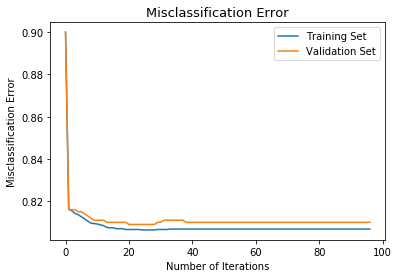

In [13]:
# Train a classifier
vals = myrhologistic(X=xtrain, Y=ytrain, init=np.zeros([xtrain.shape[0],]), lamb=1, rho=2, eps=0.001)

# Misclassification error plot
ME_plot(x_train, y_train, x_val, y_val, vals)

- Find the value of the regularization parameter $\lambda$ using leave-one-out cross-validation. Find the value of the regularization parameter $\lambda$ using hold-out cross-validation. Train a classifier using $l_2$-regularized binary logistic regression with $\rho$-logistic loss on the training set using your own accelerated gradient algorithm with that value of $\lambda$ found by hold-out cross-validation. Plot, with different colors, the misclassification error on the training set and on the validation set vs. iterations.

**Leave-one-out cross validation**

In [ ]:
class1 = -1
class2 = 1
lamb_opt = crossval(X=xtrain.T, Y=ytrain, option='Leave-one-out')

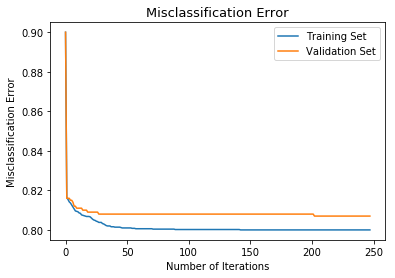

In [14]:
# Run Leave-one-out cross validation on AWS overnight
lamb_opt = 0

# Train a classifier
vals = myrhologistic(X=xtrain, Y=ytrain, init=np.zeros([xtrain.shape[0],]), lamb=lamb_opt, rho=2, eps=0.001)
ME_plot(x_train, y_train, x_val, y_val, vals)

**Hold-out cross validation**

In [15]:
class1 = -1
class2 = 1
lamb_opt = crossval(X=xtrain.T, Y=ytrain, option='Hold-out', train_percent=0.8)

Hold-out cross-validation
lambda   average score
0.0000   0.9150000000
0.1000   0.9150000000
0.2000   0.9250000000
0.3000   0.9250000000
0.4000   0.9250000000
0.5000   0.9250000000
0.6000   0.9250000000
0.7000   0.9250000000
0.8000   0.9250000000
0.9000   0.9250000000
1.0000   0.9250000000

The misclassification error for optimal lambda = 0.2000 is 0.0750000000


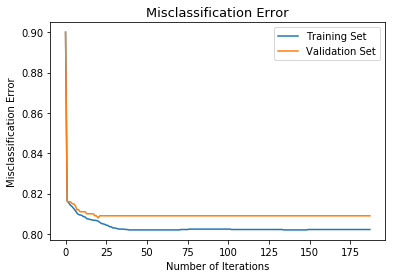

In [16]:
# Train a classifier
vals = myrhologistic(X=xtrain, Y=ytrain, init=np.zeros([xtrain.shape[0],]), lamb=lamb_opt, rho=2, eps=0.001)
class1 = 0
class2 = 1
ME_plot(x_train, y_train, x_val, y_val, vals)

- Consider all pairs of classes from the dataset. For each pair of classes, train a classifier using a $l_2$-regularized binary logistic regression with $\rho$-logistic loss on the training set comprising only the data-points for that pair of classes using your own fast gradient algorithm. For each pair of classes, find the value of the regularization parameter $\lambda$ using hold-out cross-validation on the training set comprising only the data-points for that pair of classes.

In [17]:
def subsetData(X, Y):
    # Subset training data
    x = X
    y = Y
    idx_train = np.array([np.where(y==class1),np.where(y==class2)]).reshape(-1)
    x = x[idx_train]
    y = y[idx_train]

    # Standardize the data
    scaler = sklearn.preprocessing.StandardScaler()
    scaler = scaler.fit(np.array(x))
    x = scaler.transform(x).T
    y = y.T

    # Change label to +/- 1
    y[y==class1] = -1
    y[y==class2] = 1
    
    return x, y

In [24]:
# Load train set and validation set
x_train = np.load('train_features.npy')
y_train = np.load('train_labels.npy').T

from itertools import combinations

pairs = list(combinations([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 2))
clfs = []
for pair in pairs:
    class1 = pair[0]
    class2 = pair[1]
    print('Class 1: %d\nClass 2: %d' % (class1, class2))
    xtrain, ytrain = subsetData(x_train, y_train)
    class1 = -1
    class2 = 1
    # Hold-out cross validation
    lamb_opt = crossval(X=xtrain.T, Y=ytrain, option='Hold-out', train_percent=0.8)
    print('')
    # Train a classifier
    vals = myrhologistic(X=xtrain, Y=ytrain, init=np.zeros([xtrain.shape[0],]), lamb=lamb_opt, rho=2, eps=0.001)
    clfs.append(vals[vals.shape[0]-1])

Class 1: 0
Class 2: 1
Hold-out cross-validation
lambda   average score
0.0000   0.9150000000
0.1000   0.9250000000
0.2000   0.9250000000
0.3000   0.9250000000
0.4000   0.9250000000
0.5000   0.9250000000
0.6000   0.9250000000
0.7000   0.9250000000
0.8000   0.9200000000
0.9000   0.9250000000
1.0000   0.9250000000

The misclassification error for optimal lambda = 0.1000 is 0.0750000000


Class 1: 0
Class 2: 2
Hold-out cross-validation
lambda   average score
0.0000   0.8800000000
0.1000   0.8850000000
0.2000   0.8900000000
0.3000   0.8850000000
0.4000   0.8900000000
0.5000   0.8900000000
0.6000   0.8900000000
0.7000   0.8900000000
0.8000   0.8850000000
0.9000   0.8850000000
1.0000   0.8850000000

The misclassification error for optimal lambda = 0.2000 is 0.1100000000


Class 1: 0
Class 2: 3
Hold-out cross-validation
lambda   average score
0.0000   0.9400000000
0.1000   0.9400000000
0.2000   0.9400000000
0.3000   0.9450000000
0.4000   0.9450000000
0.5000   0.9450000000
0.6000   0.9450000000

lambda   average score
0.0000   0.9650000000
0.1000   0.9650000000
0.2000   0.9600000000
0.3000   0.9600000000
0.4000   0.9600000000
0.5000   0.9600000000
0.6000   0.9600000000
0.7000   0.9600000000
0.8000   0.9600000000
0.9000   0.9600000000
1.0000   0.9600000000

The misclassification error for optimal lambda = 0.0000 is 0.0350000000


Class 1: 2
Class 2: 8
Hold-out cross-validation
lambda   average score
0.0000   0.9550000000
0.1000   0.9600000000
0.2000   0.9600000000
0.3000   0.9600000000
0.4000   0.9600000000
0.5000   0.9600000000
0.6000   0.9600000000
0.7000   0.9600000000
0.8000   0.9600000000
0.9000   0.9600000000
1.0000   0.9600000000

The misclassification error for optimal lambda = 0.1000 is 0.0400000000


Class 1: 2
Class 2: 9
Hold-out cross-validation
lambda   average score
0.0000   0.9350000000
0.1000   0.9350000000
0.2000   0.9350000000
0.3000   0.9350000000
0.4000   0.9350000000
0.5000   0.9350000000
0.6000   0.9400000000
0.7000   0.9400000000
0.8000   0.9400000000
0.9

0.1000   0.8450000000
0.2000   0.8500000000
0.3000   0.8450000000
0.4000   0.8450000000
0.5000   0.8500000000
0.6000   0.8550000000
0.7000   0.8500000000
0.8000   0.8500000000
0.9000   0.8550000000
1.0000   0.8500000000

The misclassification error for optimal lambda = 0.6000 is 0.1450000000


Class 1: 7
Class 2: 9
Hold-out cross-validation
lambda   average score
0.0000   0.8450000000
0.1000   0.8500000000
0.2000   0.8550000000
0.3000   0.8500000000
0.4000   0.8450000000
0.5000   0.8500000000
0.6000   0.8450000000
0.7000   0.8500000000
0.8000   0.8550000000
0.9000   0.8500000000
1.0000   0.8500000000

The misclassification error for optimal lambda = 0.2000 is 0.1450000000


Class 1: 8
Class 2: 9
Hold-out cross-validation
lambda   average score
0.0000   0.8750000000
0.1000   0.8700000000
0.2000   0.8700000000
0.3000   0.8700000000
0.4000   0.8700000000
0.5000   0.8700000000
0.6000   0.8650000000
0.7000   0.8650000000
0.8000   0.8700000000
0.9000   0.8750000000
1.0000   0.8750000000

The

- Write a function that for any new data point predicts its label. To do this, you will perform the following: input the data point into each classifier (for each pair of classes) you trained above. Record the class predicted by each classifier. Then your prediction for this data point is the most frequently predicted class. If there is a tie, randomly choose between the tied classes. Report the misclassification error on the validation set and test set. Report the precision/recall on the validation set.

**Predict Label**

In [46]:
from scipy.stats import mode

def predict(X, beta, cls1, cls2, threshold=0.5):
    pred = 1/(1+np.exp(-X.T.dot(beta))) > threshold # logistic function
    pred = pred.astype(int) # True 1 False 0
    pred[pred==0] = cls1
    pred[pred==1] = cls2
    return pred.T

def prediction(X, betas):
    preds = np.array([[0]]*X.shape[1])
    
    for i in range(len(betas)):
        pred = predict(X, betas[i], pairs[i][0], pairs[i][1])
        pred = np.array([pred])
        preds = np.concatenate((preds, pred.T), axis=1)
    res, cnt = mode(preds, axis=1)
    
    return res, preds

**Validation Set**

In [47]:
# Load and standardize validation set 
x_val = np.load('val_features.npy')
y_val = np.load('val_labels.npy').T
scaler = sklearn.preprocessing.StandardScaler()
scaler = scaler.fit(np.array(x_val))
x_val = scaler.transform(x_val).T

pred, preds = prediction(x_val, clfs)
pred = pred.reshape(-1)

me_val = np.mean(pred != y_val)
print('Misclassification error on the validation set: %.10f' % me_val)
print('Precision on the validation set: %.10f' % (1-me_val))

Misclassification error on the validation set: 0.3870000000
Precision on the validation set: 0.6130000000


**Test Set**

In [35]:
# Load and standardize test set 
x_test = np.load('test_features.npy')
scaler = sklearn.preprocessing.StandardScaler()
scaler = scaler.fit(x_test)
x_test = scaler.transform(x_test).T

# Predict
pred, preds = prediction(x_test, clfs)
pred = pred.reshape(-1)

# Write to submission.csv
df = pd.read_csv('sample_submission.csv')
df['Category'] = pred
df.to_csv('submission.csv',index=False)

In [36]:
me_test = 1 - 0.59666 # score from Kaggle
print('Misclassification error on the test set: %.10f' % me_test)

Misclassification error on the test set: 0.4033400000
